# ControlNets: Stable Diffusion for accurate data viz generation

In [21]:
import pandas as pd
from plotnine import *
from datetime import datetime


chart_name = f"chart_{datetime.utcnow()}.png"
chart_name_output = f"chart_{datetime.utcnow()}_output.png"

In [22]:
# Create sample data
data = pd.DataFrame({
'category': ['1980s', '1990s', '2000s', '2010s', '2020s'],
'value': [8, 23, 25, 35, 15],
'group': ['Early Career', 'Peak Mainstream', 'Peak Mainstream', 'Independent Era', 'Renaissance']
})

In [23]:
base_plot = (ggplot(data, aes(x='category', y='value', fill='group'))
 + geom_bar(stat='identity', position='dodge', width=0.8, fill='white', color='black')
 + theme_minimal()
 + theme(
     figure_size=(10, 6),
     panel_grid=element_blank(),

        axis_text=element_text(size=6, alpha = 0),
        axis_title=element_text(size=10, alpha = 0),
        plot_title=element_text(size=8, face='bold', alpha = 0),
 ))


In [24]:

text_only = (ggplot(data, aes(x='category', y='value', fill='group'))
    +theme_minimal()
        + labs(
    title='Bar Chart',
    x=' Legible Text ',
    y=' Y Axis ')
    +theme(
        figure_size=(10, 6),
        panel_grid=element_blank(),
        axis_text=element_text(size=6),
        axis_title=element_text(size=10,alpha=0),
        plot_title=element_text(size=8, face='bold',hjust = 0,alpha=1),
        panel_background=element_rect(fill='none'),
        plot_background=element_rect(fill='none'),
        
        

    ) + scale_y_continuous(limits=[0, max(data['value'])])

)


# Save separately
base_plot.save(chart_name, dpi=300, width=512/300, height=512/300)
text_only.save("text.png", dpi=300, width=512/300, height=512/300)
base_plot.save("chart.png", dpi=300, width=512/300, height=512/300)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 1.7066666666666668 x 1.7066666666666668 in image.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: chart_2025-01-16 00:22:02.779128.png
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 1.7066666666666668 x 1.7066666666666668 in image.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: text.png
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 1.7066666666666668 x 1.7066666666666668 in image.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: chart.png


In [25]:
# IMPORT API KEY FROM .ENV CONFIGURATION FILE

from dotenv import load_dotenv
load_dotenv()
import replicate

## This requires a ".env" file with  REPLICATE_API_TOKEN= ####
## See replicate's documentation for how to set this up.



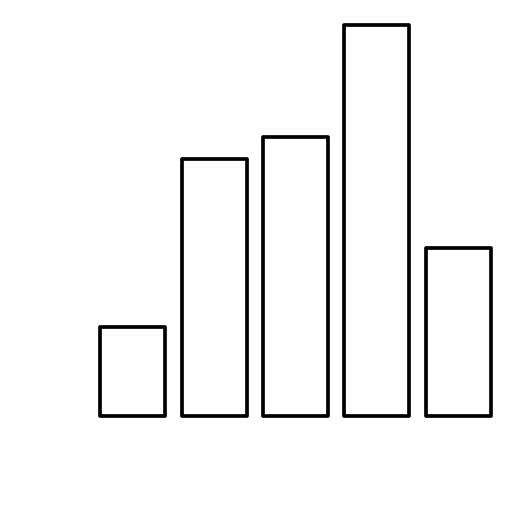

In [26]:
import base64

# Read the PNG file and convert to base64
with open(chart_name, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

# Create the URI
uri = f"data:image/png;base64,{encoded_string}"

# Optionally print or save the URI
print(uri)

In [27]:
prompt_beach = "a bar chart made out of ocean waves with a beach in the background. The bottom 20% of the image must be all white. "


prompt_city = "A bar chart made out of skyscrapers"
prompt_dc = "A bar chart made out of washington monuments"
prompt_data = "A bar chart graph where each bar chart is a database icon"
prompt_mario = " A bar chart made out of THWOMPS from super mario. Each bar is a large stone covered in spikes with an angry face"
prompt_bus = "a bar chart made of cartoon yellow school buses. Each bus must have wheels and windows. Cute. "
prompt_town = "A bar chart made out of rowhouses and small office buildings"
prompt_ladders = "A bar chart made out of construction ladders, styled as a game of chutes and ladders. game board style"
prompt_cheese = "A bar chart made out of blocks of cheese and crackers on a wooden board. Delicious. Photoreal"

prompt_charts = "a bar chart containing small line charts, with a large pie chart in the background"
prompt_lego = "A bar chart of colorful large lego toys. Photography. High quality. Glossy. Real"
prompt_christmas = "candycanes"
prompt_gifts = "wrapped presents with colorful wrapping paper and bright ribbons and bows"
prompt_kitkat = "candy bars with bite marks"
prompt_cake = "lit birthday candles on a cake"
prompt_pipes = "green mario pipes in super mario level 13. retro video game"


prompt = prompt_beach

In [28]:
output = replicate.run(
    "rossjillian/controlnet:795433b19458d0f4fa172a7ccf93178d2adb1cb8ab2ad6c8fdc33fdbcd49f477",
    input={
        "eta": 0,
        "seed": 404,
        "image": uri,
        "scale": 9,
        "steps": 50,
        "prompt": prompt,
        "scheduler": "DDIM",
        "structure": "canny",
        "num_outputs": 1,
        "low_threshold": 100,
        "high_threshold": 200,
        "negative_prompt": " worst quality, low quality",
        "image_resolution": 512,
        "return_reference_image": False
    }
)
#print(output)
with open(chart_name_output, 'wb') as f:
    f.write(output[0].read())

with open(f"chart_output.png", 'wb') as f:
    f.write(output[0].read())

In [29]:
from PIL import Image


def overlay_images(base_path, text_path, output_path):
    base = Image.open(base_path)
    text = Image.open(text_path).convert('RGBA')
    
    # Create transparency mask
    r, g, b, a = text.split()
    mask = Image.new('L', text.size, 255)
    for x in range(text.width):
        for y in range(text.height):
            if r.getpixel((x, y)) > 250 and g.getpixel((x, y)) > 250 and b.getpixel((x, y)) > 250:
                mask.putpixel((x, y), 0)
    
    # Apply mask and composite
    text.putalpha(mask)
    result = Image.alpha_composite(base.convert('RGBA'), text)
    result.save(output_path, 'PNG')



def concatenate_images(image1_path, image2_path, output_path):
    """
    Concatenate two 512x512 images horizontally into a 1024x512 image
    
    Args:
        image1_path (str): Path to first image
        image2_path (str): Path to second image
        output_path (str): Path where to save the resulting image
    """
    # Open the images
    img1 = Image.open(image1_path)
    img2 = Image.open(image2_path)
    
    # Ensure both images are 512x512
    img1 = img1.resize((512, 512))
    img2 = img2.resize((512, 512))
    
    # Create a new blank image with the combined width
    combined_width = img1.width + img2.width
    combined_height = img1.height
    
    combined_image = Image.new('RGB', (combined_width, combined_height))
    
    # Paste the two images side by side
    combined_image.paste(img1, (0, 0))
    combined_image.paste(img2, (512, 0))
    
    # Save the result
    combined_image.save(output_path, quality=95)
    
    return combined_image


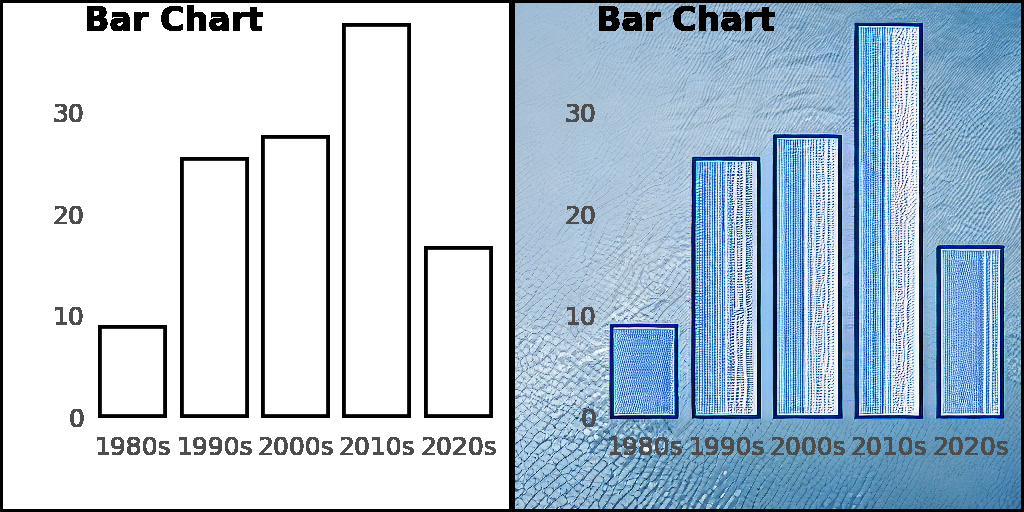

In [30]:
overlay_images(chart_name_output, 'text.png', chart_name_output)
overlay_images(chart_name, 'text.png', chart_name)
concatenate_images(chart_name, chart_name_output, f"combined_{chart_name_output}")
concatenate_images(chart_name, chart_name_output, f"combined_output.png")
